In [26]:
import re
import pandas as pd
import numpy as np
from scipy.ndimage.interpolation import shift
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix, hstack
from sklearn.model_selection import train_test_split
from datetime import datetime
from matplotlib import pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn.neural_network import MLPClassifier
from sklearn.svm import NuSVC, SVC
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingRegressor
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error
from sklearn import preprocessing

In [27]:
data = pd.read_csv('newstitle_gbp_xau.csv')
data.head()

,timestamp,title,gbp,xau
0,1167580800,Italy puts froth back into cappuccino Patients...,1.959094,324.767450
1,1167667200,Pork soup handouts not racist - French judge Y...,1.973442,324.524002
2,1167753600,Iraqi PM rules out second term Zimbabwe poised...,1.949440,322.762609
3,1167840000,Senior soldier condemns state of forces housin...,1.944289,322.798264
4,1167926400,Three of Pinochet family cleared News in Brief...,1.929921,314.234051


In [28]:
def timestamptodate(**data):
    ts = datetime.strptime(data['ts'], '%Y%m%d').timestamp()
    te = datetime.strptime(data['te'], '%Y%m%d').timestamp()
    idx = np.logical_and(te>=data['x'], ts<=data['x'])
    return data['x'][idx], data['gbp'][idx], data['xau'][idx]

In [29]:
x = data.as_matrix(columns=['timestamp']).reshape(-1)
#x= np.apply_along_axis(timestamptodate, 1, x)

In [30]:
gbp = data.as_matrix(columns=['gbp']).reshape(-1)
xau = data.as_matrix(columns=['xau']).reshape(-1)

In [31]:
gbp = preprocessing.normalize(gbp)
xau = preprocessing.normalize(xau)

/usr/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/usr/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


In [32]:
xau

array([[ 0.00671034,  0.00670531,  0.00666892, ...,  0.02023954,
         0.02023476,  0.02023342]])

In [33]:
gbp = np.gradient(gbp.reshape(-1))
xau = np.gradient(xau.reshape(-1))
gbp = np.gradient(gbp.reshape(-1))
xau = np.gradient(xau.reshape(-1))

In [34]:
ts='20170101'
te='20170430'
x, gbp, xau = timestamptodate(ts=ts, te=te, x=x, gbp=gbp,xau=xau)

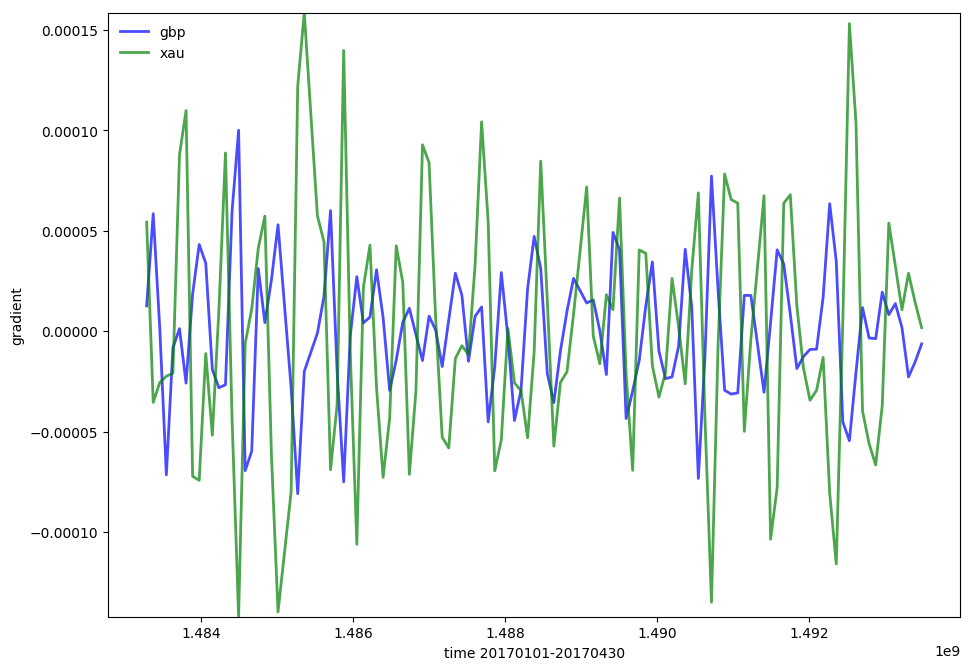

In [35]:
plt.figure(figsize=(11,8), dpi=100, facecolor='white')
plt.ylabel('gradient')
plt.xlabel('time %s-%s'%(ts,te))
plt.plot(x, gbp, color="blue", linewidth=2, linestyle="-", label="gbp", alpha=0.7)
plt.plot(x, xau, color="green", linewidth=2, linestyle="-", label="xau", alpha=0.7)
plt.legend(loc='upper left', frameon=False)
plt.ylim(np.min([gbp, xau]),np.max([gbp,xau]))
plt.show()

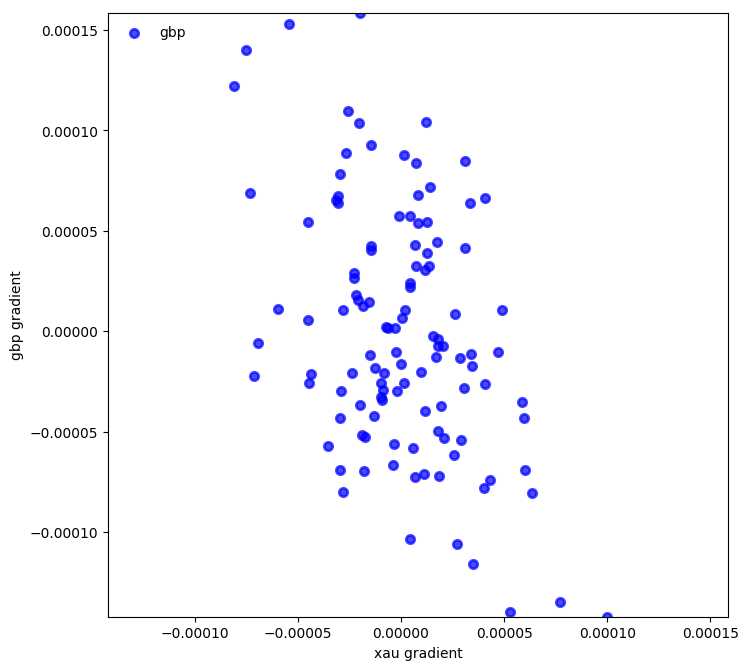

In [36]:
plt.figure(figsize=(8,8), dpi=100, facecolor='white')
plt.ylabel('gbp gradient')
plt.xlabel('xau gradient')
plt.scatter(gbp, xau, color="blue", linewidth=2, linestyle="-", label="gbp", alpha=0.7)
#plt.plot(x, xau, color="green", linewidth=2, linestyle="-", label="xau", alpha=0.7)
plt.legend(loc='upper left', frameon=False)
plt.ylim(np.min([gbp, xau]),np.max([gbp,xau]))
plt.xlim(np.min([gbp, xau]),np.max([gbp,xau]))
plt.show()